In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(20,10))
plt.style.use('tableau-colorblind10')

In [5]:
df = pd.read_feather('data/train.feather')

In [26]:
OPS = ['mean', 'median']

def aggregate(data, time_slice, sample=None):
    if sample is not None:
        data = data.sample(sample)
    return (data.groupby(pd.Grouper(key='pickup_datetime', freq=time_slice))
             .fare_amount
             .agg(OPS)
             .rename(columns={col: '-'.join((col, time_slice)) for col in OPS})) 

In [75]:
%%time
SAMPLE = int(1e6)
TIME_SLICES = ['1M', '1W', '1D', '12H', '6H', '3H', '1H']
grouped = {t: aggregate(df, t, SAMPLE) for t in TIME_SLICES}

CPU times: user 27.7 s, sys: 1.33 s, total: 29.1 s
Wall time: 29.4 s


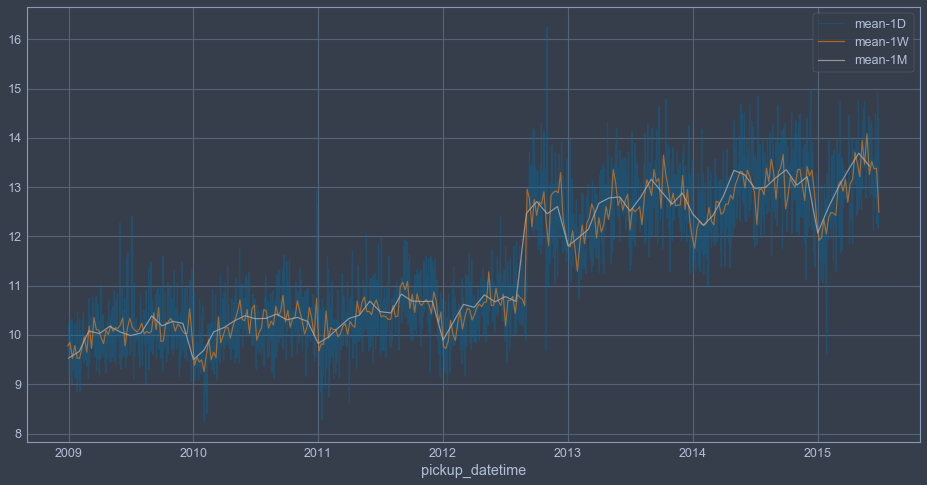

In [87]:
ax = plt.axes()

# skipping hour scale for now
not_hour = set(filter(lambda c: 'H' not in c, TIME_SLICES))
alpha_step = 0.2
alpha = 1 - (len(not_hour) * alpha_step)

for scale, aggs in reversed(list(grouped.items())):
    # skip hour scale for now
    if scale in not_hour:
        cols = [c for c in aggs.columns if 'mean' in c]
        aggs[cols].plot(ax=ax, alpha=alpha)
        # make it more subtle as the scale gets smaller
        alpha += alpha_step